In [1]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import silhouette_score
import gower


In [2]:
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"
color_lime = 'lime'
color_green = 'forestgreen'
color_blue = "#1a559e"


In [3]:
# Set pandas display options to see more data
pd.set_option('display.max_rows', 20)  # Show more rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase display width
pd.set_option('display.max_colwidth', 100)  # Increase column width

In [4]:
# 1. Data loading and preparation
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Phone.csv')
df.head()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,16,True,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,16,False,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,16,False,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,32,True,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,32,True,True,True,False,True,True,False,False,False,False,420.0


In [ ]:
# 2. Preprocessing
# Select relevant columns (example)
cols_to_use = ['brand', 'os', 'battery_type', 'price(USD)', 'battery', 'weight(g)', 'storage(GB)']
data = df[cols_to_use].copy()

# Identify categorical columns (indices after selection)
categorical_cols = [0, 1, 2]  # brand, os, battery_type

# Standardize numerical columns
numeric_cols = [i for i in range(len(cols_to_use)) if i not in categorical_cols]
scaler = StandardScaler()
data.iloc[:, numeric_cols] = scaler.fit_transform(data.iloc[:, numeric_cols])


C:\Users\vinor\AppData\Local\Temp\ipykernel_33740\2865721065.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-2.79187336 -2.15440082 -1.7719173  ...  1.08395964  0.2679948
  0.2679948 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, numeric_cols] = scaler.fit_transform(data.iloc[:, numeric_cols])
C:\Users\vinor\AppData\Local\Temp\ipykernel_33740\2865721065.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.25201381 -1.25201381 -1.25201381 ...  1.97327829 -1.45359456
  0.2531225 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, numeric_cols] = scaler.fit_transform(data.iloc[:, numeric_cols])


In [6]:
# 3. Determination of optimal number of clusters
costs = []
silhouette_scores = []

# Define the range of k values to test
k_range = (2, 13)  # Testing from 2 to 12 clusters

for k in range(*k_range):  # Testing from 2 to 12 clusters
    kproto = KPrototypes(n_clusters=k, init='Huang', verbose=0)
    clusters = kproto.fit_predict(data, categorical=categorical_cols)
    costs.append(kproto.cost_)

    distance_matrix = gower.gower_matrix(data)

    silhouette_avg = silhouette_score(distance_matrix, clusters, metric='precomputed')
    silhouette_scores.append(silhouette_avg)
    
    print(f"K={k}, Cost={kproto.cost_:.2f}")
    print(f"K={k}, Silhouette Score={silhouette_avg:.4f}")
    

K=2, Cost=5731.56
K=2, Silhouette Score=0.1946
K=3, Cost=4640.90
K=3, Silhouette Score=0.1338
K=4, Cost=4118.93
K=4, Silhouette Score=0.1158
K=5, Cost=3716.07
K=5, Silhouette Score=0.0877
K=6, Cost=3295.06
K=6, Silhouette Score=0.0876
K=7, Cost=3040.25
K=7, Silhouette Score=0.0871
K=8, Cost=2897.53
K=8, Silhouette Score=0.0663
K=9, Cost=2716.71
K=9, Silhouette Score=0.0531
K=10, Cost=2594.19
K=10, Silhouette Score=0.0544
K=11, Cost=2499.00
K=11, Silhouette Score=0.0474
K=12, Cost=2423.92
K=12, Silhouette Score=0.0375


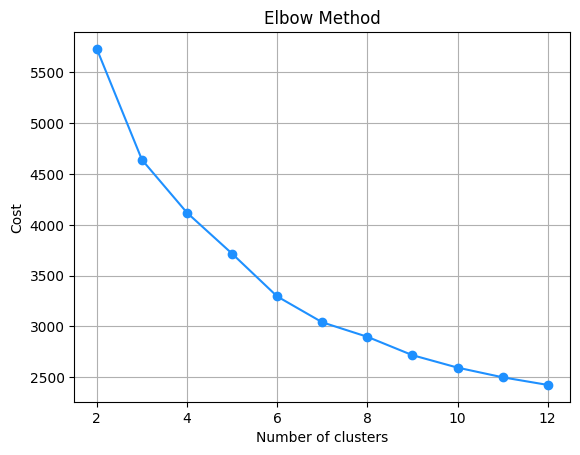

In [7]:
# Elbow method visualization
plt.plot(range(*k_range), costs, marker='o', color=color_blue_light)
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.grid()
plt.show()


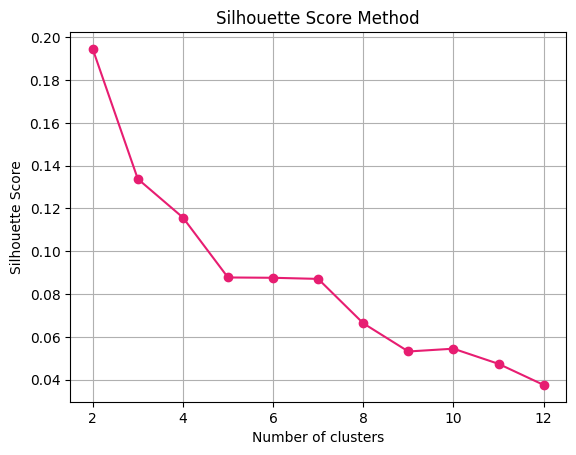

In [8]:
# Plot silhouette scores
plt.plot(range(*k_range), silhouette_scores, marker='o', color=color_pink)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show()
    

In [ ]:
# 4. Application of K-Prototypes with optimal k (e.g., k=5)
optimal_k = 5
kproto = KPrototypes(n_clusters=optimal_k, init='Huang', verbose=1)
clusters = kproto.fit_predict(data, categorical=categorical_cols)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 402, ncost: 4049.3206293214903
Run: 1, iteration: 2/100, moves: 208, ncost: 3931.594770203036
Run: 1, iteration: 3/100, moves: 105, ncost: 3900.699335159975
Run: 1, iteration: 4/100, moves: 59, ncost: 3887.8417985748324
Run: 1, iteration: 5/100, moves: 58, ncost: 3873.259786556959
Run: 1, iteration: 6/100, moves: 77, ncost: 3850.552736898336
Run: 1, iteration: 7/100, moves: 149, ncost: 3745.9920652591863
Run: 1, iteration: 8/100, moves: 108, ncost: 3720.93786044928
Run: 1, iteration: 9/100, moves: 52, ncost: 3711.9905530696915
Run: 1, iteration: 10/100, moves: 29, ncost: 3709.7628450569473
Run: 1, iteration: 11/100, moves: 24, ncost: 3708.489049323046
Run: 1, iteration: 12/100, moves: 11, ncost: 3708.2097315208066
Run: 1, iteration: 13/100, moves: 3, ncost: 3708.142526458543
Run: 1, iteration: 14/100, moves: 0, ncost: 3708.142526458543
Init: initializing centroids
Init: init

In [14]:
# 5. Results analysis
df['cluster'] = clusters

# Visualization of cluster distribution
print(df['cluster'].value_counts())

# Mean of features by cluster
# Mean of numerical features by cluster
print("Numerical features by cluster:")
numeric_features = [col for i, col in enumerate(cols_to_use) if i in numeric_cols]
# Create a more readable table of numerical features by cluster
cluster_means = df.groupby('cluster')[numeric_features].mean()
# Sort clusters by price in descending order
cluster_means = cluster_means.sort_values(by='price(USD)', ascending=False)
print("Clusters sorted by average price (high to low):")
print(cluster_means.round(2))

# Show clusters with their respective sizes
cluster_sizes = df['cluster'].value_counts().sort_index()
print("\nCluster sizes:")
for cluster_id, count in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {count} phones ({count/len(df)*100:.1f}%)")

# Mode of categorical features by cluster
print("\nCategorical features by cluster (most common value):")
for i, col in enumerate(cols_to_use):
    if i in categorical_cols:
        print(f"\n{col}:")
        for cluster_id in range(optimal_k):
            top_value = df[df['cluster'] == cluster_id][col].value_counts().index[0]
            count = df[df['cluster'] == cluster_id][col].value_counts().iloc[0]
            pct = count / len(df[df['cluster'] == cluster_id]) * 100
            print(f"  Cluster {cluster_id}: {top_value} ({pct:.1f}%)")


cluster
4    565
3    441
2    274
0    134
1     98
Name: count, dtype: int64
Numerical features by cluster:
Clusters sorted by average price (high to low):
         price(USD)  battery  weight(g)  storage(GB)
cluster                                             
1           1114.92  4478.02     207.48       166.29
0            394.27  4642.80     203.35       277.01
3            316.98  4153.64     182.44       106.49
4            251.83  5074.22     197.52        93.31
2            243.27  3203.29     160.84        43.65

Cluster sizes:
Cluster 0: 134 phones (8.9%)
Cluster 1: 98 phones (6.5%)
Cluster 2: 274 phones (18.1%)
Cluster 3: 441 phones (29.2%)
Cluster 4: 565 phones (37.4%)

Categorical features by cluster (most common value):

brand:
  Cluster 0: Vivo (21.6%)
  Cluster 1: Samsung (18.4%)
  Cluster 2: Samsung (21.9%)
  Cluster 3: Oppo (24.0%)
  Cluster 4: Xiaomi (29.6%)

os:
  Cluster 0: Android 13 (38.1%)
  Cluster 1: Android 10 (30.6%)
  Cluster 2: Android 9.0 (25.2%)
  Clus

In [15]:
# 6. Cluster interpretation with clusters sorted by average price
# First calculate average price for each cluster
avg_prices = df.groupby('cluster')['price(USD)'].mean().sort_values(ascending=False)
sorted_clusters = avg_prices.index

print("Clusters sorted by average price (high to low):")
for i, cluster_id in enumerate(sorted_clusters):
    print(f"\nCluster {cluster_id} (Rank {i+1}):")
    print("Most common brands:", df[df['cluster']==cluster_id]['brand'].value_counts().head(3))
    print("Average price: $", round(df[df['cluster']==cluster_id]['price(USD)'].mean(), 2))
    print("Average battery:", round(df[df['cluster']==cluster_id]['battery'].mean(), 2), "mAh")
    print("Average weight:", round(df[df['cluster']==cluster_id]['weight(g)'].mean(), 2), "g")
    print("Average storage:", round(df[df['cluster']==cluster_id]['storage(GB)'].mean(), 2), "GB")
    print("Cluster size:", len(df[df['cluster']==cluster_id]), "phones")


Clusters sorted by average price (high to low):

Cluster 1 (Rank 1):
Most common brands: brand
Samsung    18
Huawei     14
Xiaomi     14
Name: count, dtype: int64
Average price: $ 1114.92
Average battery: 4478.02 mAh
Average weight: 207.48 g
Average storage: 166.29 GB
Cluster size: 98 phones

Cluster 0 (Rank 2):
Most common brands: brand
Vivo     29
Oppo     28
Honor    19
Name: count, dtype: int64
Average price: $ 394.27
Average battery: 4642.8 mAh
Average weight: 203.35 g
Average storage: 277.01 GB
Cluster size: 134 phones

Cluster 3 (Rank 3):
Most common brands: brand
Oppo      106
Huawei     55
Xiaomi     46
Name: count, dtype: int64
Average price: $ 316.98
Average battery: 4153.64 mAh
Average weight: 182.44 g
Average storage: 106.49 GB
Cluster size: 441 phones

Cluster 4 (Rank 4):
Most common brands: brand
Xiaomi    167
Realme     96
Vivo       85
Name: count, dtype: int64
Average price: $ 251.83
Average battery: 5074.22 mAh
Average weight: 197.52 g
Average storage: 93.31 GB
Clust

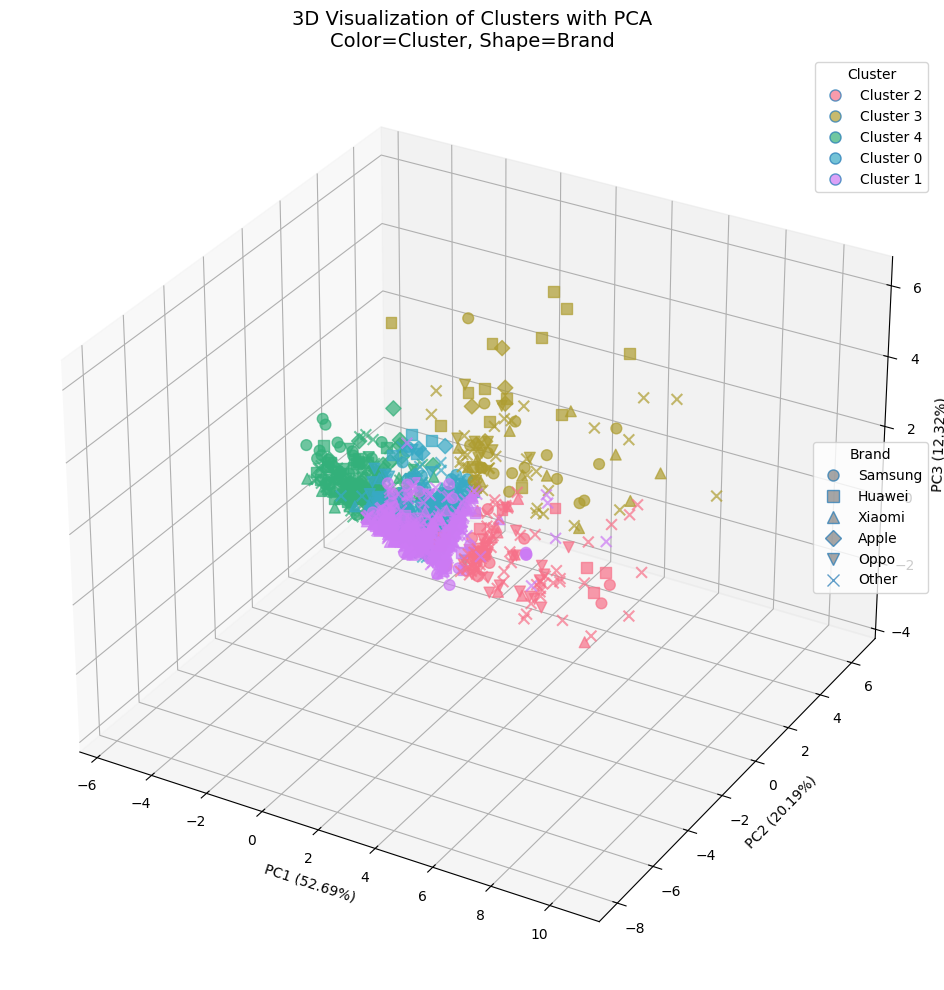


Variance explained by principal components:
PC1: 52.69%
PC2: 20.19%
PC3: 12.32%

Characteristics of principal components:
     price(USD)   battery  weight(g)  storage(GB)   ram(GB)    inches
PC1    0.213193  0.388835   0.446937     0.411522  0.428533  0.500612
PC2    0.622148 -0.481473  -0.262449     0.404907  0.297651 -0.244314
PC3    0.682103 -0.005497   0.372602    -0.393474 -0.477675  0.113484


In [17]:
# Select only the numeric columns for PCA
numeric_cols = ['price(USD)', 'battery', 'weight(g)', 'storage(GB)', 'ram(GB)', 'inches']
data_numeric = df[numeric_cols].dropna()

# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# 3. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2', 'PC3'])

# Add cluster and brand information
pca_df['Cluster'] = df.loc[data_numeric.index, 'cluster']
pca_df['Brand'] = df.loc[data_numeric.index, 'brand']

# 4. Prepare shape maps for brands
# Select the top 5 most frequent brands to simplify visualization
top_brands = pca_df['Brand'].value_counts().nlargest(5).index.tolist()

# Create shapes dictionary (excluding less frequent brands)
marker_map = {
    'Samsung': 'o',
    'Huawei': 's',
    'Xiaomi': '^',
    'Apple': 'D',
    'Oppo': 'v',
    'Other': 'x'  # For all other brands
}

pca_df['Marker'] = pca_df['Brand'].apply(lambda x: marker_map[x] if x in marker_map else marker_map['Other'])

# 5. Create 3D plot
plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

# Color palette for clusters
palette = sns.color_palette("husl", n_colors=len(pca_df['Cluster'].unique()))

# Plot for each cluster-marker combination
for cluster in pca_df['Cluster'].unique():
    for marker in pca_df['Marker'].unique():
        subset = pca_df[(pca_df['Cluster'] == cluster) & (pca_df['Marker'] == marker)]
        if not subset.empty:
            ax.scatter(subset['PC1'], 
                       subset['PC2'], 
                       subset['PC3'],
                       c=[palette[cluster]],
                       marker=marker,
                       s=60,
                       alpha=0.7,
                       label=f'Cluster {cluster}, {subset["Brand"].iloc[0]}' if marker != 'x' else f'Cluster {cluster}, Other')

# Add custom legend
handles = []
for cluster, color in zip(pca_df['Cluster'].unique(), palette):
    handles.append(plt.Line2D([0], [0], linestyle="none", 
                            marker="o", alpha=0.7, markersize=8,
                            markerfacecolor=color, label=f'Cluster {cluster}'))
    
brand_shapes = [plt.Line2D([0], [0], linestyle="none", 
                marker=marker, alpha=0.7, markersize=8,
                markerfacecolor='gray', label=brand) 
               for brand, marker in marker_map.items()]

first_legend = ax.legend(handles=handles, title='Cluster', loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=brand_shapes, title='Brand', loc='center right')

ax.set_xlabel('PC1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
ax.set_ylabel('PC2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
ax.set_zlabel('PC3 (%.2f%%)' % (pca.explained_variance_ratio_[2]*100))
ax.set_title('3D Visualization of Clusters with PCA\nColor=Cluster, Shape=Brand', fontsize=14)

plt.tight_layout()
plt.show()

# 6. Additional information about components
print("\nVariance explained by principal components:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var*100:.2f}%")

# Show the weight of original features on PCs
print("\nCharacteristics of principal components:")
components_df = pd.DataFrame(pca.components_, columns=numeric_cols, index=['PC1', 'PC2', 'PC3'])
print(components_df)
